# KHUSHI SINGH (19SCSE1180013)

## IRIS DATASET ASSIGNMENT

In [1]:
import numpy as np

In [2]:
class Perceptron(object):
    def __init__(self, learning_rate=0.01, n_iter=100, random_state=1):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.random_state = random_state
    def fit(self, X, y):
        rand = np.random.RandomState(self.random_state)
        self.weights = rand.normal(loc=0.0, scale=0.01, size=1 +  X.shape[1])
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for x, target in zip(X, y):
                update = self.learning_rate * (target - self.predict(x))
                self.weights[1:] += update * x
                self.weights[0] += update
                errors += int(update != 0.0)
                self.errors_.append(errors)
            return self
    def net_input(self, X):
        z = np.dot(X, self.weights[1:]) + self.weights[0]
        return z
    def predict(self, X):
        return np.where(self.net_input(X) > 0, 1, 0)

In [3]:
import pandas as pd
data = pd.read_csv("iris dataset.txt")
data = data[:100]

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['class'] = le.fit_transform(data['class'])
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
per = Perceptron(learning_rate=0.1, n_iter=100, random_state=1)
per.fit(X_train, y_train)
output = per.predict(X_test)

In [7]:
output

array([1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0])

In [8]:
y_test

array([1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0])

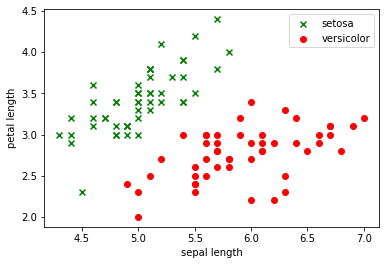

In [9]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.scatter(X[:50, 0], X[:50, 1],
            color='green', marker='x', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='red', marker='o', label='versicolor')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc='upper right')
plt.show()